In [1]:

import matplotlib.pyplot as plt
#import scipy.stats as sts
import numpy as np
import cmdstanpy ## import stan interface for Python
#from scipy.integrate import solve_ivp
#from matplotlib.gridspec import GridSpec
import os
import seaborn as sns
import pandas as pd
#import math
# from scipy.special import logit,expit
from importlib import reload 
import sys
# import patchworklib as pw
sys.path.append("..")
from statannotations.Annotator import Annotator
from itertools import product
import matplotlib.ticker as mticker
import arviz
import matplotlib as mpl

tex_fonts = {
    # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "Helvetica",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 7,
    "font.size": 7,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "axes.grid": True,
    'grid.color': '#DDDDDD',
    'grid.linestyle': '-',
    'grid.linewidth': 0.3,
    "lines.markersize":4,
    
    'axes.axisbelow':True,
    'lines.linewidth':1,
    'pdf.fonttype':42,
    'axes.linewidth':0.6,
    'xtick.major.width':0.5,
    'ytick.major.width':0.5,
    'ytick.minor.width':0.3,

    'ytick.major.pad':0.2,
        "xtick.major.size":3,
    "ytick.major.size":3,
}

plt.rcParams.update(tex_fonts)



# label_size = 30
# mpl.rcParams['xtick.labelsize'] = label_size 
# mpl.rcParams['ytick.labelsize'] = label_size 
# mpl.rcParams['lines.markersize'] = 20  
# plt.rcParams['axes.grid'] = True
# mpl.rcParams['font.family']='Helvetica'

ratio= 2/(1+np.sqrt(5))

width = 520.344
if os.name == "nt": ## adds compiler to path in Windows
    cmdstanpy.utils.cxx_toolchain_path() 
    
# %config InlineBackend.close_figures=False # keep figures open in pyplot
# #%config InlineBackend.print_figure_kwargs = {'bbox_inches':"tight", 'pad_inches':2}


# sigma = 0.15

# switchtime = 21
# numObs = 27
# tmax = 35

# # time_index = np.concatenate((np.logspace(-1,np.log10(switchtime),num=int(numObs/2)), (np.logspace(-1,np.log10(tmax-switchtime),num=int(numObs/2)))+switchtime))
# #time_index = np.linspace(tmax/numObs,tmax,numObs)
# switch = (numofbrduint+2)*(numofki67int+2)
# y0_est = np.zeros((numofki67int+2)*(numofbrduint+2)*2)

time_index_equilibrium = np.linspace(10000/1, 10000, 1)
my_pal = {"4CM": "g", 
          "4EM": "m", 
          "4Naive":"#a4e0ef", 
          "Host":"#ff7f0e",
#             "donor":"blue", 
#           "host":"#DC582A",
         "4EM.CD69+":"#02feff",
         "Kihi":"#7d81fc",
         "Kilo":"#f50aff",
         "Kimid":"r"}

my_marks = {"4CM": "o",#"$\circ$", 
           "4EM": "^",
         "4Naive":"o",
         "4EM.CD69+CD103+":"P",
         "Old CHIM":"^"}

scatterkwags = {#"palette": my_pal,
                  #"markers":my_marks,
                    'edgecolor':"k",
                "alpha":0.7,
                "zorder":1,
                
}

dfyfp = pd.read_csv('/opt/mesh/tiree/elise/samples_1/data_yfp_4.csv',index_col='MouseID')
dftom = pd.read_csv('/opt/mesh/tiree/elise/samples_1/data_tom_4.csv',index_col='MouseID')


def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def enumerated_product(*args):
    yield from zip(product(*(range(len(x)) for x in args)), product(*args))
    


In [2]:
organc=['SK']

#splines all data >5
# run = "_r6"
# location = '/opt/mesh/tiree/elise/samples_1/cd4_skin'+run

#splines remove >5 and <400
# run = "_r7"
# location = '/opt/mesh/tiree/elise/samples_1/cd4_skin'+run

#simuluatenous remove >5
# run = "_r1"
# location = '/opt/mesh/tiree/elise/samples_1/cd4_all'+run

#simuluatenous remove >5 and <400
# run = "_r2"
# location = '/opt/mesh/tiree/elise/samples_1/cd4_all'+run

#simuluatenous remove >5 tighter sigma prior
run = "_r3"
location = '/opt/mesh/tiree/elise/samples_1/cd4_all'+run


(0, 0, 0, 0)
('4Naive', '4EM', 'Kihi', 'SK')
homog-20240917163709_3.csv
homog-20240917163709_1.csv
homog-20240917163709_2.csv
homog-20240917163709_4.csv
homog-20240917163709_5.csv
(0, 0, 1, 0)
('4Naive', '4EM', 'Kilo', 'SK')
homog-20240917163716_2.csv
homog-20240917163716_1.csv
homog-20240917163716_4.csv
homog-20240917163716_3.csv
homog-20240917163716_5.csv
(0, 0, 2, 0)
('4Naive', '4EM', 'Kimid', 'SK')
homog-20240917163740_2.csv
homog-20240917163740_5.csv
homog-20240917163740_1.csv
homog-20240917163740_4.csv
homog-20240917163740_3.csv
(0, 1, 0, 0)
('4Naive', '4EM.CD69+', 'Kihi', 'SK')
homog-20240917163739_5.csv
homog-20240917163739_4.csv
homog-20240917163739_3.csv
homog-20240917163739_1.csv
homog-20240917163739_2.csv
(0, 1, 1, 0)
('4Naive', '4EM.CD69+', 'Kilo', 'SK')
homog-20240917163802_5.csv
homog-20240917163802_2.csv
homog-20240917163802_4.csv
homog-20240917163802_1.csv
homog-20240917163802_3.csv
(0, 1, 2, 0)
('4Naive', '4EM.CD69+', 'Kimid', 'SK')
homog-20240917163750_5.csv
homog-20

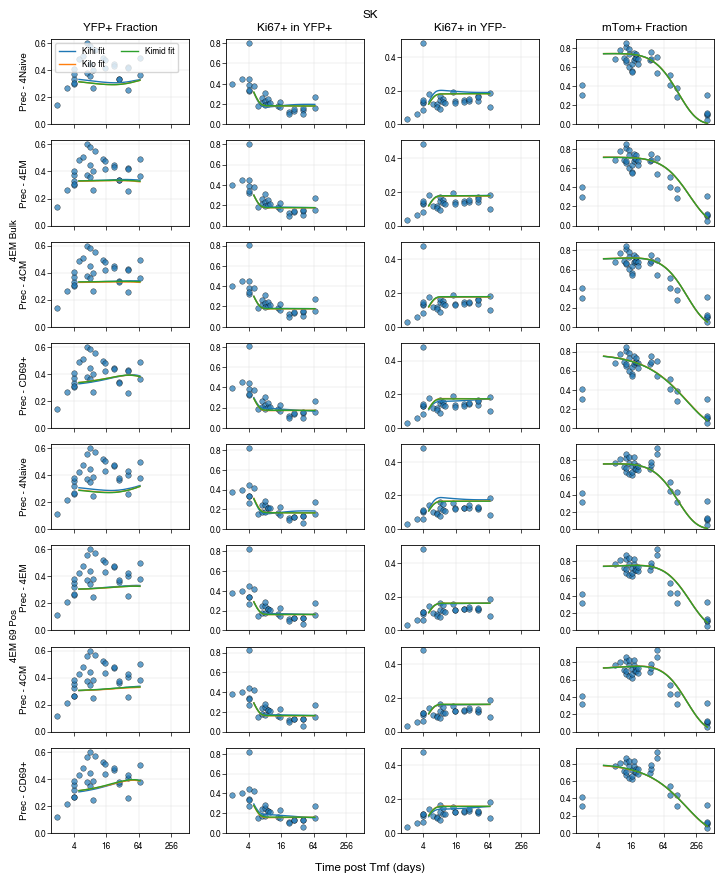

In [3]:

typei = "homog"


precursorc = ['4Naive','4EM','4CM','69']
populationc = ['4EM','4EM.CD69+']
ki67c = ['Kihi','Kilo','Kimid']


dfoldyfp = dfyfp[(dfyfp['organ'] == organc[0])]#&(dfyfp['Timepoint'] > 7)
dfoldtom = dftom[(dftom['organ'] == organc[0])]#&(dfyfp['Timepoint'] > 7)

fig, ax = plt.subplots(len(precursorc)*len(populationc),4, figsize=set_size(width, subplots=(len(precursorc)*len(populationc), 4)),sharex=True)


for idx, adhpop in enumerated_product(precursorc,populationc,ki67c,organc):
    fullloc = location+"/stan-cache-"+adhpop[1]+adhpop[0]+adhpop[2]+adhpop[3]+"_"+str(1)+"/"
    
    print(idx)
    print(adhpop)
    
    fl = []
    fb = []
    fh = []
    
    #data slicing and manulipulation

    sys.path.insert(1, fullloc)
    import paras
    reload(paras)
    
    for f_name in os.listdir(fullloc):
        if f_name.endswith('.csv')&f_name.startswith('branched'):
            print(f_name)
            fb.append(fullloc+f_name)
        elif f_name.endswith('.csv')&f_name.startswith('linear'):
            print(f_name)
            fl.append(fullloc+f_name)
        elif f_name.endswith('.csv')&f_name.startswith('homog'):
            print(f_name)
            fh.append(fullloc+f_name)

    if typei == "branched":
        sam = cmdstanpy.from_csv(fb)
    else:
        sam = cmdstanpy.from_csv(fh)


    time_index_calc = np.logspace(np.log10(5),np.log10(paras.tmax_y),num=int(100))
    time_index_t_calc = np.logspace(np.log10(5),np.log10(paras.tmax_t),num=int(100))

    y1 =  sam.stan_variable("f_yfphi_calc")
    y2 =  sam.stan_variable("f_kihi_yfphi_calc")
    y3 =  sam.stan_variable("f_kihi_yfplo_calc")
    y4 =  sam.stan_variable("f_tomhi_calc")
    

    #yfp frac
    ax1 = ax[len(precursorc)*idx[1]+idx[0],0]

    mB = np.median(y1[:,:], axis=0)
    lB, uB = np.percentile(y1[:,:], axis=0, q=[2.5, 97.5])
    ax1.plot(time_index_calc, mB,label=adhpop[2]+' fit') #,c = colors[idx[0]]
#     ax1.fill_between(time_index_calc, lB, uB, alpha=0.4)
    
    if adhpop[2]=='Kihi':
        sns.scatterplot(data = dfoldyfp[(dfoldyfp['population'] == adhpop[1])], 
                        x="Timepoint",
                y="YFP+frac",ax=ax1,
               **scatterkwags)    
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    ax1.set_ylim(bottom=0)
#     ax1.set_ylim([0,1])
    ax1.set_xscale("log",base=2)
    ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
    
    #Kihi+ in YFP+ frac
    ax1 = ax[len(precursorc)*idx[1]+idx[0],1]

    mB = np.median(y2[:,:], axis=0)
    lB, uB = np.percentile(y2[:,:], axis=0, q=[2.5, 97.5])
    ax1.plot(time_index_calc, mB) #,c = colors[idx[0]]
#     ax1.fill_between(time_index_calc, lB, uB, alpha=0.4)
    
    if adhpop[2]=='Kihi':
        sns.scatterplot(data = dfoldyfp[(dfoldyfp['population'] == adhpop[1])], x="Timepoint",
                y='YFP+.Ki67+frac', ax=ax1,
               **scatterkwags,legend=False)    
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    ax1.set_ylim(bottom=0)
#     ax1.set_ylim([0,1])
    
    #Kihi+ in YFP- frac
    ax1 = ax[len(precursorc)*idx[1]+idx[0],2]

    mB = np.median(y3[:,:], axis=0)
    lB, uB = np.percentile(y3[:,:], axis=0, q=[2.5, 97.5])
    ax1.plot(time_index_calc, mB) #,c = colors[idx[0]]
#     ax1.fill_between(time_index_calc, lB, uB, alpha=0.4)
    
    if adhpop[2]=='Kihi':
        sns.scatterplot(data = dfoldyfp[(dfoldyfp['population'] == adhpop[1])], x="Timepoint",
                y='YFP-.Ki67+frac', ax=ax1,
               **scatterkwags,legend=False)    
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    ax1.set_ylim(bottom=0)
    
    #mtom Frac
    ax1 = ax[len(precursorc)*idx[1]+idx[0],3]

    mB = np.median(y4[:,:], axis=0)
    lB, uB = np.percentile(y4[:,:], axis=0, q=[2.5, 97.5])
    ax1.plot(time_index_t_calc, mB) #,c = colors[idx[0]]
#     ax1.fill_between(time_index_calc, lB, uB, alpha=0.4)
    
    if adhpop[2]=='Kihi':
        sns.scatterplot(data = dfoldtom[(dfoldtom['population'] == adhpop[1])], x="Days_post_treatment",
                y='mT+frac', ax=ax1,
               **scatterkwags,legend=False)    
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    ax1.set_ylim(bottom=0)

#     ax1.set_ylim([0,1])
    

fig.text(0,0.7,'4EM Bulk',rotation='vertical')
fig.text(0,0.25,'4EM 69 Pos',rotation='vertical')
fig.supxlabel('Time post Tmf (days)')
ax[0,2].set_title('Ki67+ in YFP-')
ax[0,0].set_ylabel('Prec - 4Naive')
ax[1,0].set_ylabel('Prec - 4EM')
ax[2,0].set_ylabel('Prec - 4CM')
ax[3,0].set_ylabel('Prec - CD69+')
ax[0,0].set_title('YFP+ Fraction')
ax[4,0].set_ylabel('Prec - 4Naive')
ax[5,0].set_ylabel('Prec - 4EM')
ax[6,0].set_ylabel('Prec - 4CM')
ax[7,0].set_ylabel('Prec - CD69+')
ax[0,1].set_title('Ki67+ in YFP+')
ax[0,3].set_title('mTom+ Fraction')
ax[1,0].get_legend().remove()
ax[2,0].get_legend().remove()
ax[3,0].get_legend().remove()
ax[4,0].get_legend().remove()
ax[5,0].get_legend().remove()
ax[6,0].get_legend().remove()
ax[7,0].get_legend().remove()
handles, labels = ax[0,0].get_legend_handles_labels()
order = [0,1,2]


# Place the legend
lgd = ax[0,0].legend(
    [handles[idx] for idx in order],[labels[idx] for idx in order],
    loc="upper left", 
    ncol=2,
)
# # Modify the point edge colour
# for ha in ax[0,0].legend_.legendHandles[0:2]:
#     ha.set_edgecolor("black")


plt.suptitle(organc[0])
plt.tight_layout()

fig.savefig('/home/elise/Dropbox/elisepaperclone/CD4SkinGut/Figures/fits_'+organc[0]+'.pdf', 
            dpi='figure', format='pdf',
        bbox_inches='tight', pad_inches=0.1)

fig.savefig('/home/elise/Dropbox/elisepaperclone/CD4SkinGut/Figures/fits_'+organc[0]+'.png',
            dpi='figure', format='png',
        bbox_inches='tight', pad_inches=0.1)   

(0, 0, 0, 0)
('4Naive', '4EM', 'Kihi', 'SK')
homog-20240917163709_3.csv
homog-20240917163709_1.csv
homog-20240917163709_2.csv
homog-20240917163709_4.csv
homog-20240917163709_5.csv
(0, 1, 0, 0)
('4Naive', '4EM.CD69+', 'Kihi', 'SK')
homog-20240917163739_5.csv
homog-20240917163739_4.csv
homog-20240917163739_3.csv
homog-20240917163739_1.csv
homog-20240917163739_2.csv
(1, 0, 0, 0)
('4EM', '4EM', 'Kihi', 'SK')
homog-20240917163810_1.csv
homog-20240917163810_5.csv
homog-20240917163810_4.csv
homog-20240917163810_2.csv
homog-20240917163810_3.csv
(1, 1, 0, 0)
('4EM', '4EM.CD69+', 'Kihi', 'SK')
homog-20240917163911_5.csv
homog-20240917163911_3.csv
homog-20240917163911_4.csv
homog-20240917163911_2.csv
homog-20240917163911_1.csv
(2, 0, 0, 0)
('4CM', '4EM', 'Kihi', 'SK')
homog-20240917164013_2.csv
homog-20240917164013_1.csv
homog-20240917164013_5.csv
homog-20240917164013_3.csv
homog-20240917164013_4.csv
(2, 1, 0, 0)
('4CM', '4EM.CD69+', 'Kihi', 'SK')
homog-20240917164112_2.csv
homog-20240917164112_5

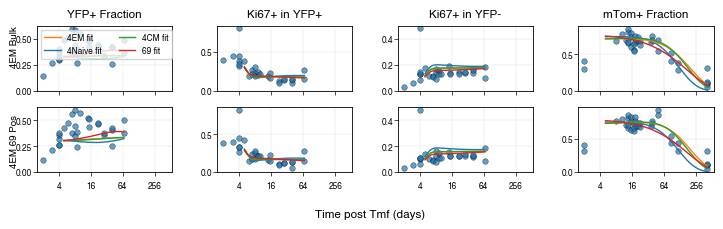

In [4]:
fig, ax = plt.subplots(2,4 , figsize=set_size(width, subplots=(2, 4)), sharex=True)

typei = "homog"


precursorc = ['4Naive','4EM','4CM','69']
populationc = ['4EM','4EM.CD69+']
ki67c = ['Kihi']


dfoldyfp = dfyfp[(dfyfp['organ'] == organc[0])]
dfoldtom = dftom[(dftom['organ'] == organc[0])]

for idx, adhpop in enumerated_product(precursorc,populationc,ki67c,organc):
    fullloc = location+"/stan-cache-"+adhpop[1]+adhpop[0]+adhpop[2]+adhpop[3]+"_"+str(1)+"/"
    
    print(idx)
    print(adhpop)
    
    fl = []
    fb = []
    fh = []
    
    #data slicing and manulipulation

    sys.path.insert(1, fullloc)
    import paras
    reload(paras)
    
    for f_name in os.listdir(fullloc):
        if f_name.endswith('.csv')&f_name.startswith('branched'):
            print(f_name)
            fb.append(fullloc+f_name)
        elif f_name.endswith('.csv')&f_name.startswith('linear'):
            print(f_name)
            fl.append(fullloc+f_name)
        elif f_name.endswith('.csv')&f_name.startswith('homog'):
            print(f_name)
            fh.append(fullloc+f_name)

    if typei == "branched":
        sam = cmdstanpy.from_csv(fb)
    else:
        sam = cmdstanpy.from_csv(fh)


    time_index_calc = np.logspace(np.log10(5),np.log10(paras.tmax_y),num=int(100))
    time_index_t_calc = np.logspace(np.log10(5),np.log10(paras.tmax_t),num=int(100))

    y1 =  sam.stan_variable("f_yfphi_calc")
    y2 =  sam.stan_variable("f_kihi_yfphi_calc")
    y3 =  sam.stan_variable("f_kihi_yfplo_calc")
    y4 =  sam.stan_variable("f_tomhi_calc")
    

    #yfp frac
    ax1 = ax[idx[1],0]

    mB = np.median(y1[:,:], axis=0)
    lB, uB = np.percentile(y1[:,:], axis=0, q=[2.5, 97.5])
    ax1.plot(time_index_calc, mB,label=adhpop[0]+' fit') #,c = colors[idx[0]]
#     ax1.fill_between(time_index_calc, lB, uB, alpha=0.4)
    
    if adhpop[0]=='4Naive':
        sns.scatterplot(data = dfoldyfp[(dfoldyfp['population'] == adhpop[1])], 
                        x="Timepoint",
                y="YFP+frac",ax=ax1,
               **scatterkwags)    
    ax1.set_ylabel('')
    ax1.set_xlabel('')
#     ax1.set_ylim([0,1])
    ax1.set_xscale("log",base=2)
    ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax1.set_ylim(bottom=0)

    #Kihi+ in YFP+ frac
    ax1 = ax[idx[1],1]

    mB = np.median(y2[:,:], axis=0)
    lB, uB = np.percentile(y2[:,:], axis=0, q=[2.5, 97.5])
    ax1.plot(time_index_calc, mB) #,c = colors[idx[0]]
#     ax1.fill_between(time_index_calc, lB, uB, alpha=0.4)
    
    if adhpop[0]=='4Naive':
        sns.scatterplot(data = dfoldyfp[(dfoldyfp['population'] == adhpop[1])], x="Timepoint",
                y='YFP+.Ki67+frac', ax=ax1,
               **scatterkwags,legend=False)    
    ax1.set_ylabel('')
    ax1.set_xlabel('')
#     ax1.set_ylim([0,1])
    ax1.set_ylim(bottom=0)
    
    #Kihi+ in YFP- frac
    ax1 = ax[idx[1],2]

    mB = np.median(y3[:,:], axis=0)
    lB, uB = np.percentile(y3[:,:], axis=0, q=[2.5, 97.5])
    ax1.plot(time_index_calc, mB) #,c = colors[idx[0]]
#     ax1.fill_between(time_index_calc, lB, uB, alpha=0.4)
    
    if adhpop[0]=='4Naive':
        sns.scatterplot(data = dfoldyfp[(dfoldyfp['population'] == adhpop[1])], x="Timepoint",
                y='YFP-.Ki67+frac', ax=ax1,
               **scatterkwags,legend=False)    
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    ax1.set_ylim(bottom=0)
#     ax1.set_ylim([0,1])
    
    #mtom Frac
    ax1 = ax[idx[1],3]

    mB = np.median(y4[:,:], axis=0)
    lB, uB = np.percentile(y4[:,:], axis=0, q=[2.5, 97.5])
    ax1.plot(time_index_t_calc, mB) #,c = colors[idx[0]]
#     ax1.fill_between(time_index_calc, lB, uB, alpha=0.4)
    
    if adhpop[0]=='4Naive':
        sns.scatterplot(data = dfoldtom[(dfoldtom['population'] == adhpop[1])], x="Days_post_treatment",
                y='mT+frac', ax=ax1,
               **scatterkwags,legend=False)    
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    ax1.set_ylim(bottom=0)
#     ax1.set_ylim([0,1])
    

fig.text(0,0.7,'4EM Bulk',rotation='vertical')
fig.text(0,0.25,'4EM 69 Pos',rotation='vertical')
fig.supxlabel('Time post Tmf (days)')
ax[0,2].set_title('Ki67+ in YFP-')
ax[0,0].set_title('YFP+ Fraction')
ax[0,1].set_title('Ki67+ in YFP+')
ax[0,3].set_title('mTom+ Fraction')
ax[1,0].get_legend().remove()


handles, labels = ax[0,0].get_legend_handles_labels()
order = [1,0,2,3]


# Place the legend
lgd = ax[0,0].legend(
    [handles[idx] for idx in order],[labels[idx] for idx in order],
    loc="upper left", 
    ncol=2,
)
# # Modify the point edge colour
# for ha in ax[0,0].legend_.legendHandles[0:2]:
#     ha.set_edgecolor("black")


plt.tight_layout()

fig.savefig('/home/elise/Dropbox/elisepaperclone/CD4SkinGut/Figures/fits_byprec'+organc[0]+'.pdf', 
            dpi='figure', format='pdf',
        bbox_inches='tight', pad_inches=0.1)

fig.savefig('/home/elise/Dropbox/elisepaperclone/CD4SkinGut/Figures/fits_byprec'+organc[0]+'.png',
            dpi='figure', format='png',
        bbox_inches='tight', pad_inches=0.1)   